## $\text{Introduction}$

$\text{Name : Kartik Srinivas}$


$\text{Roll : ES20BTECH11015}$

$\text{Welcome to the analysis of the Road Gradient Problem !}$

1.   
$\text{All the equations have been coded in LaTeX by me}$ 
2.  
$\text{The necessary explanations have been provided }$ 




## $\text{Notation}$

---



$\text{The Notations used are as follows}$



1.   $ \text{The elevation of the Hill } e \ 𝝐 \ \mathbb{R^{n \times 1}} $
2.   $ \text{The elevation of the road } h \ 𝝐 \ \mathbb{R^{n \times 1}} $

2.    $ \text{The set of Maximum Allowable Slopes } D \ 𝝐 \ \mathbb{R^{3 \times 1}}$

1.   $ \text{The difference in elevations } u = h - e  \ 𝝐 \ \mathbb{R^{n \times 1}} $
2.   $ \text{The cut and Fill matrices for each point on the hill } Φ_{fill} \text{ and } Φ_{cut} \ 𝝐 \ \mathbb{R^{n \times 1}} $




In [1]:
import math
import numpy as np
import cvxpy as cp

n = 100
e = np.ones((100,))
d = 1
d1 = 0.08
d2 = 0.025
d3 = 0.005
f1 = (3*math.pi)
f2 = (10*math.pi)
for i in range (1,n):
    e[i] = 5*(math.sin(i *f1/100)) +  (math.sin(i * f2/100))
h = cp.Variable(n)


### $\text{The Cut and Fill Functions}$


---
$\text{In order to code the cut and fill functions using DCP we use cp.pos() and cp.neg() }$

\begin{align}
 u = h - e  \ldots \text{ (Differences in elevation)}
 \\
 u_+ = max(u,0) \implies up = cp.pos(u)
 \\
 u_- = max(-u,0) \implies un = cp.neg(u)
\end{align}
\
\
$\text{ $Φ_{fill}$ will be a function of $u_+$ only since I need to fill a region only when }$
$\text{the height of the road is above the elevation of the hill }$

\begin{align}
 Φ_{fill} = 2 \times (u_+ * u_+) + 30* u_+
 \\
 Φ_{cut} = 12 \times (u_- * u_-) + u_-
\end{align}




In [2]:
def fill(e,h):
    u = h-e
    up = cp.pos(u)
    fill = (2*cp.power(up,2) + 30*up)
    return fill

def cut(e,h):
    u = h - e
    un = cp.neg(u)
    cut = (12 * cp.power(un, 2) + un)
    return cut

### $\text{The Cost and the Constraints}$

---
$\text{The cost is just $Φ_{fill} + Φ_{cut}$  summed up for the entire array} $

$\text{The constraints are on the absolute value of the derivatives and nothing else}$
$\text{The road must not or slope too much, we use cp.diff() for derivative approximations}$

\begin{align}
|\frac{\partial h}{\partial d}| \le D_1
\\
|\frac{\partial^2 h}{\partial d^2}| \le D_2
\\
|\frac{\partial^3 h}{\partial d^2}| \le D_3
\end{align}



In [3]:

def cost(e,h):
    cost = 0
    cost = cp.sum(fill(e,h)) + cp.sum(cut(e,h))
    return cost

constraints = [cp.abs(cp.diff(h,1)) <= d1,
                cp.abs(cp.diff(h,2)) <= d2,
                cp.abs(cp.diff(h,3)) <= d3]

objective = cp.Minimize(cost(e,h))
prob = cp.Problem(objective,constraints);
result = prob.solve(solver=cp.ECOS)
print("RESULT = ",result)

RESULT =  7550.8329738333805


### $\text{Convexity of Cut}$


---

$\text{When we plot the cut function versus $-u$ according to the equation}$
\begin{align}
\\
 u_- = max(-u,0)
 \\
 Φ_{cut} = 12 \times (u_-^2) + u_-
\end{align}
$\text{we get a convex fuction ie}$

\begin{align}
\\
\frac{∂^2Φ_{cut}}{∂(-u)^2} \ge 0
\end{align}



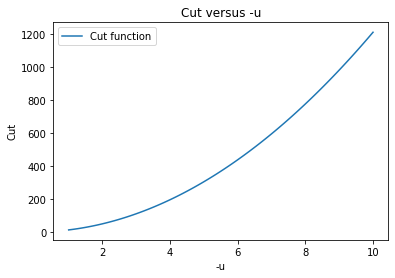

In [5]:
import matplotlib.pyplot as plt3
h2 = -1 * np.linspace(1,10,num = 100)
e2 = np.zeros((100,))
u = h2 - e2
un = -1*h2
cut2 = (12 * np.power(un, 2) + un)
plt3.plot(-u, cut2 , label = "Cut function")
plt3.title("Cut versus -u")
plt3.xlabel("-u")
plt3.ylabel("Cut")
plt3.legend()
plt3.show()

### $\text{Final Plots}$


---
$\text{We now plot the graphs of e, h , e- h and see their shapes}$


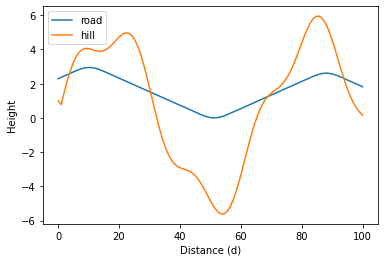

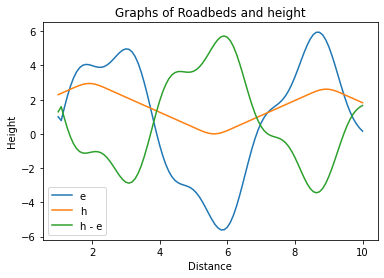

In [6]:
t = np.linspace(0,100,num = 100)
import matplotlib.pyplot as plt
plt.plot(t,h.value,label = "road")
plt.plot(t,e,label = "hill")
plt.ylabel("Height")
plt.xlabel('Distance (d)')
plt.legend()
plt.show()
import matplotlib.pyplot as plt2
j = np.linspace(1,10,num = 100)
plt2.plot(j,e,label = "e")
plt2.plot(j,h.value, label = "h")
plt2.plot(j,h.value - e,label = "h - e")
plt2.title("Graphs of Roadbeds and height")
plt2.ylabel("Height")
plt2.xlabel('Distance')
plt2.legend()
plt2.show()